In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

,Voltage (V)
0,-0.449414
1,-0.431235
2,-0.404035
3,-0.388268
4,-0.370063
...,...
99995,-0.531150
99996,-0.505966
99997,-0.493412
99998,-0.465008


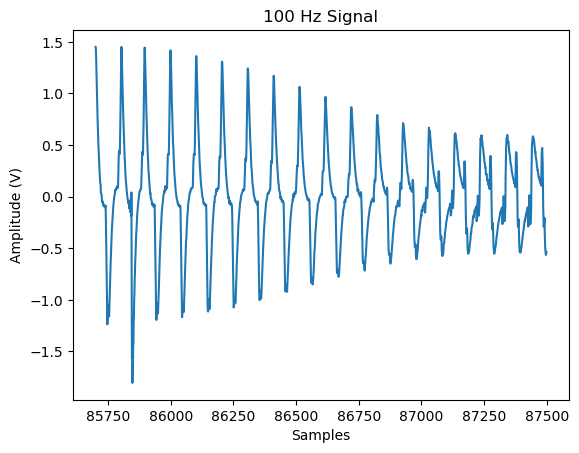

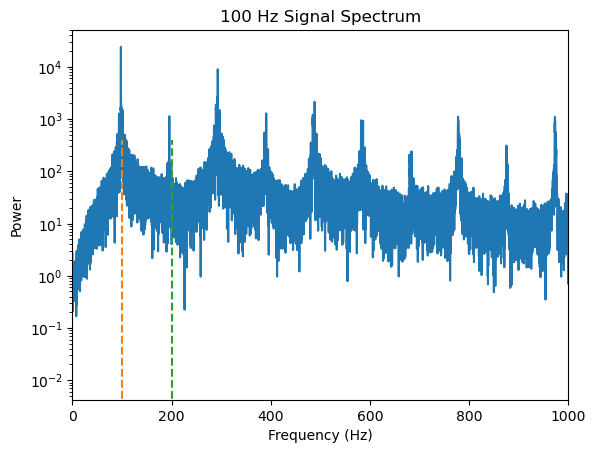

In [30]:
path = 'data/scan.csv'
data = pd.read_csv(path)

data_volts = data['Voltage (V)']
sample_rate = int(1e4)
display(data)
plt.plot(data_volts[int(85.7e3):int(87.5e3)])
plt.title('100 Hz Signal')
plt.ylabel('Amplitude (V)')
plt.xlabel('Samples')
plt.show()

data_fft = np.fft.rfft(data_volts)
data_fftfreq = np.fft.rfftfreq(len(data_volts),1./sample_rate)
plt.plot(data_fftfreq, np.abs(data_fft))
plt.xlim(0,1000)
plt.title('100 Hz Signal Spectrum')
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.plot([100,100], [0, 400], linestyle='--')
plt.plot([200,200], [0, 400], linestyle='--')
plt.yscale('log')
#plt.xscale('log')
plt.show()